In [1]:
import torch
from torch import nn

In [ ]:
import PIL



In [31]:
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 2, padding=1)   # 8 filters
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)  # 16 filters
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16*8*8, 3)

    def forward(self, x):
        x1 = self.pool(nn.ReLU()(self.conv1(x)))  # Save conv1 output
        x2 = self.pool(nn.ReLU()(self.conv2(x1))) # Save conv2 output
        x_flat = x2.view(-1, 16*8*8)
        out = self.fc1(x_flat)
        return out, x1, x2

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [69]:
import PIL
import os
import random

img = random.choice(os.listdir("/Users/benjaminbrooke/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1/Dataset_BUSI_with_GT/Train_data/benign"))

img =

In [66]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

Train_dataset = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
Test_dataset = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

train_dataset = datasets.ImageFolder(
    "/Users/benjaminbrooke/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1/Dataset_BUSI_with_GT/Train_data",
    Train_dataset)
test_dataset = datasets.ImageFolder(
    "/Users/benjaminbrooke/.cache/kagglehub/datasets/aryashah2k/breast-ultrasound-images-dataset/versions/1/Dataset_BUSI_with_GT/Test_data",
    Test_dataset)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [18]:
def plot_kernels(layer, ncols=4):
    kernels = layer.weight.data.clone()
    n_filters = kernels.shape[0]

    nrows = (n_filters + ncols - 1) // ncols
    plt.figure(figsize=(ncols*2, nrows*2))

    for i in range(n_filters):
        k = kernels[i]
        # Normalize to 0-1
        k = (k - k.min()) / (k.max() - k.min())
        # Convert CxHxW -> HxWxC for plotting
        k_img = k.permute(1,2,0)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(k_img)
        plt.axis('off')
        plt.title(f"Kernel {i}")
    plt.show()


In [64]:
def plot_image(img):
    img = img / 2 + 0.5  # unnormalize from [-1,1] to [0,1]
    npimg = img.numpy()
    # C x H x W → H x W x C
    npimg = np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg)
    plt.axis('off')
    plt.show()

In [35]:
def plot_feature_maps(feature_map, ncols=4):
    # feature_map shape: (batch_size, channels, H, W)
    fmap = feature_map[0]  # first image in batch
    n_maps = fmap.shape[0]

    nrows = (n_maps + ncols - 1) // ncols
    plt.figure(figsize=(ncols*2, nrows*2))

    for i in range(n_maps):
        m = fmap[i]
        # Normalize to 0-1
        m = (m - m.min()) / (m.max() - m.min())
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(m.detach().numpy(), cmap='gray')
        plt.axis('off')
        plt.title(f"Map {i}")
    plt.show()


In [32]:
model = SmallCNN()

Label: 1


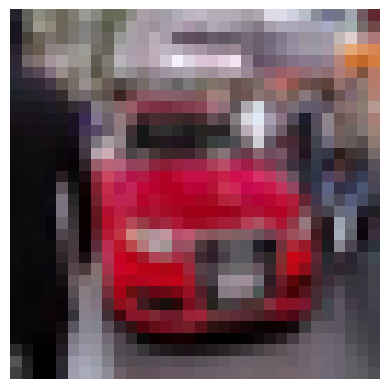

Epoch 1 Kernels conv1:


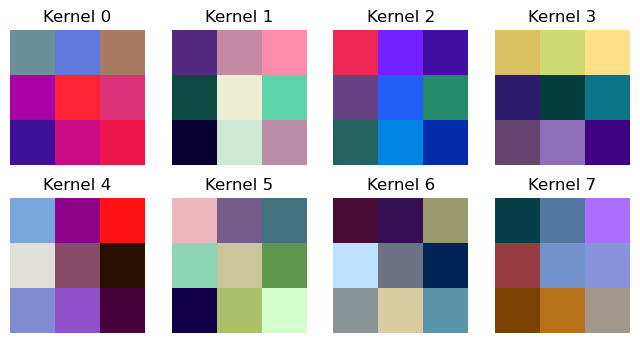

Epoch 1 Feature maps conv1:


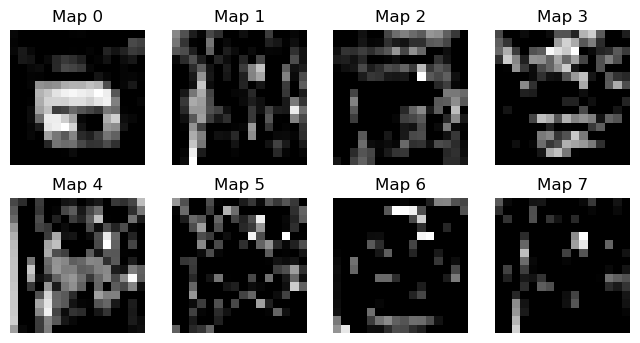

Epoch 1 Feature maps conv2:


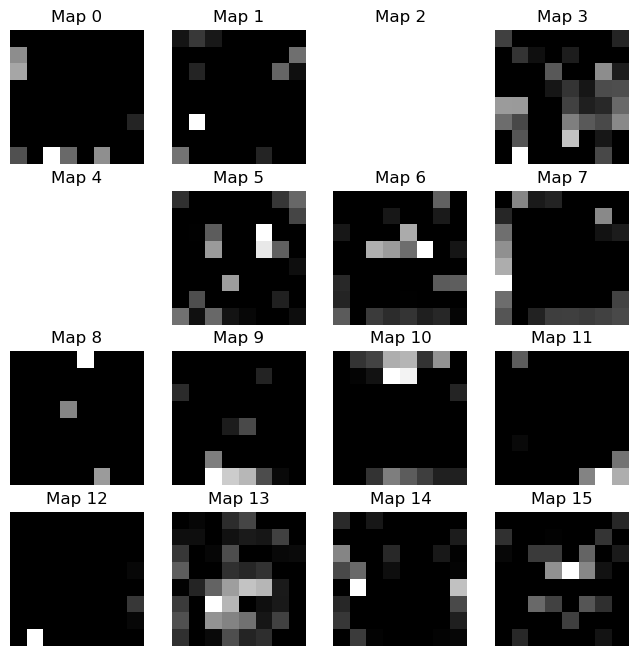

Epoch [1/10] Loss: 1.7452
Label: 6


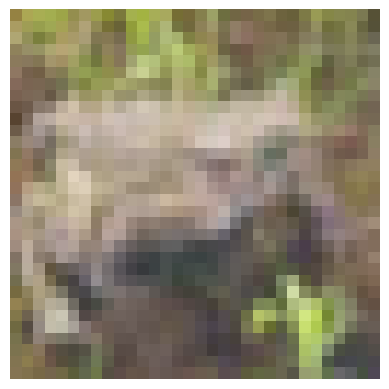

Epoch 2 Kernels conv1:


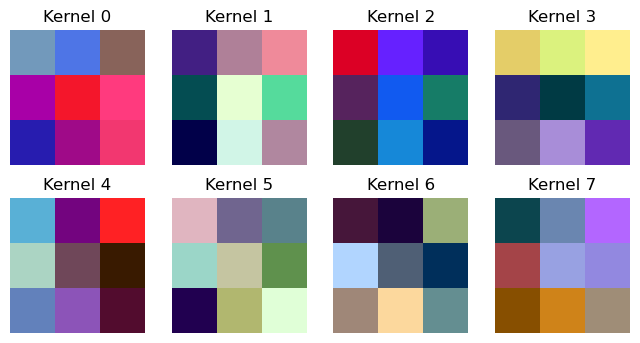

Epoch 2 Feature maps conv1:


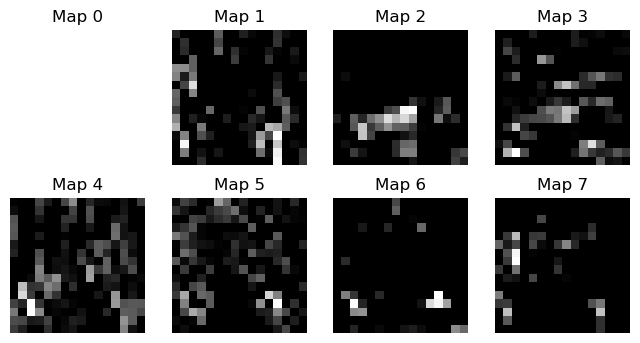

Epoch 2 Feature maps conv2:


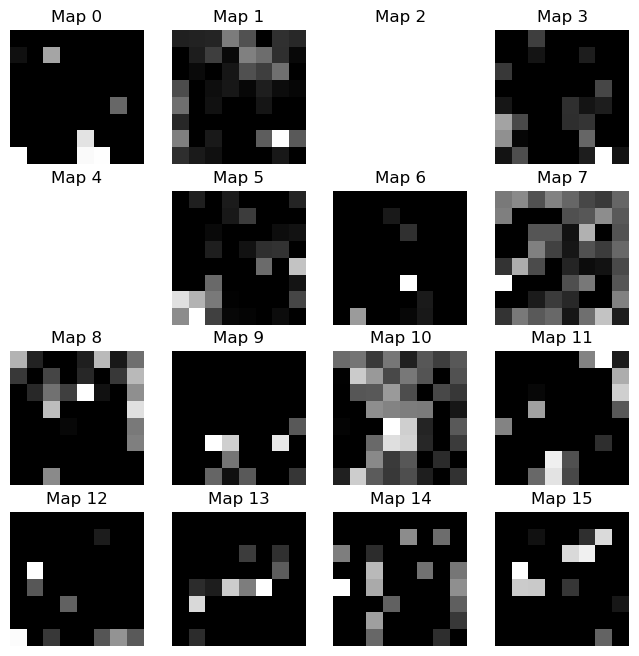

Epoch [2/10] Loss: 3.9705
Label: 5


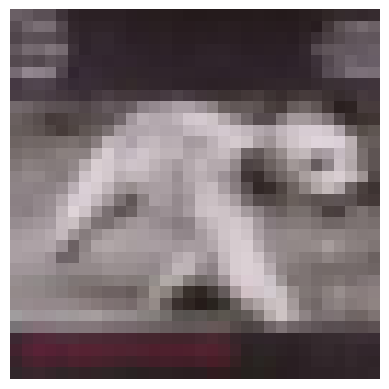

Epoch 3 Kernels conv1:


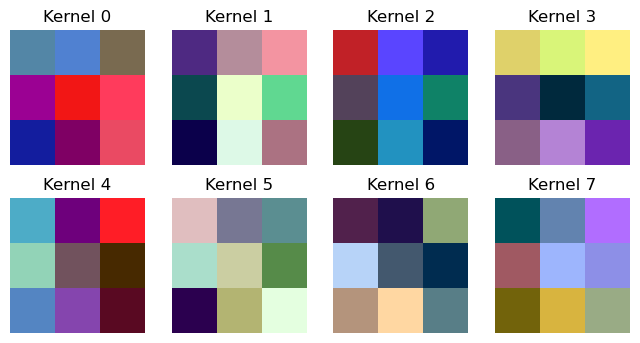

Epoch 3 Feature maps conv1:


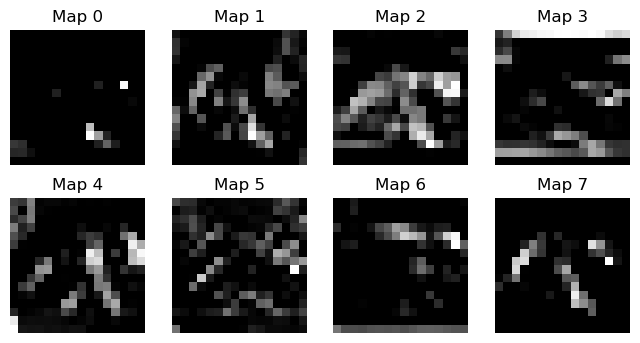

Epoch 3 Feature maps conv2:


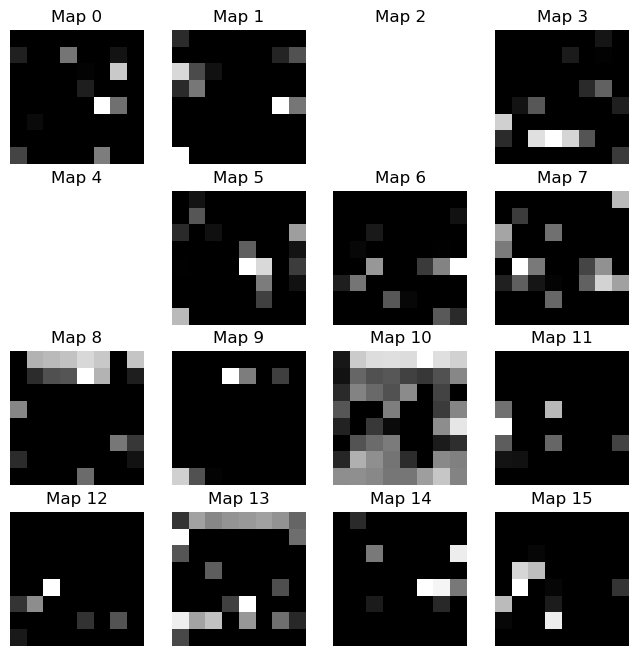

Epoch [3/10] Loss: 1.1970
Label: 4


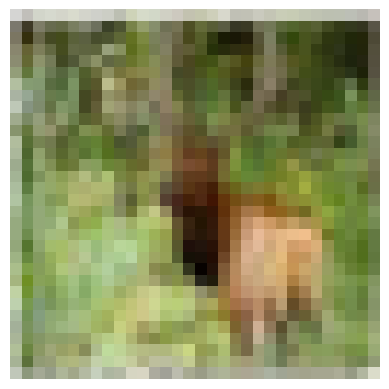

Epoch 4 Kernels conv1:


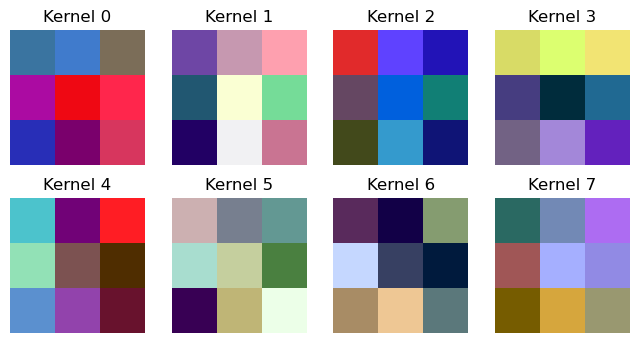

Epoch 4 Feature maps conv1:


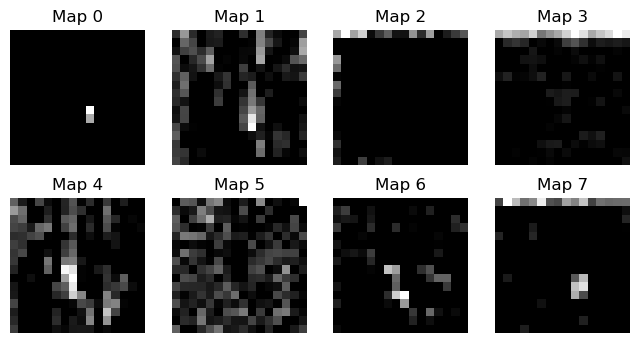

Epoch 4 Feature maps conv2:


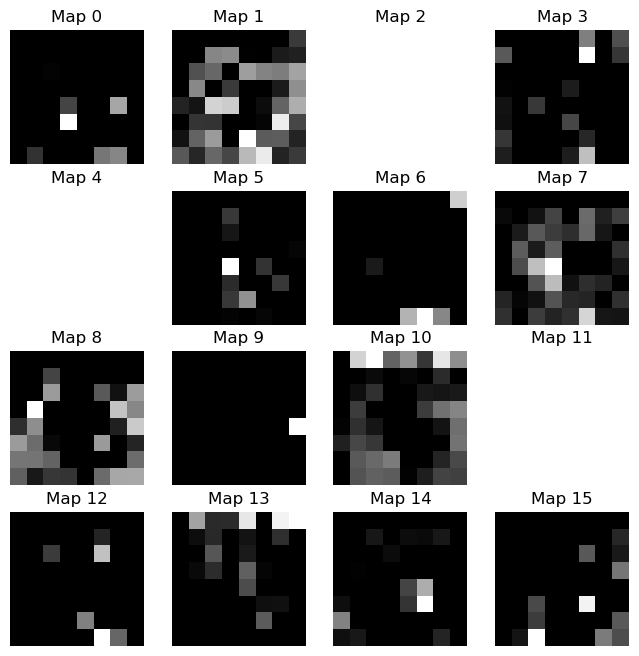

Epoch [4/10] Loss: 0.4562
Label: 9


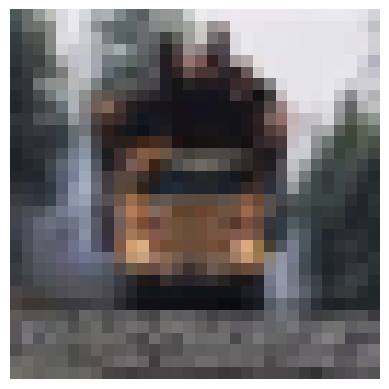

Epoch 5 Kernels conv1:


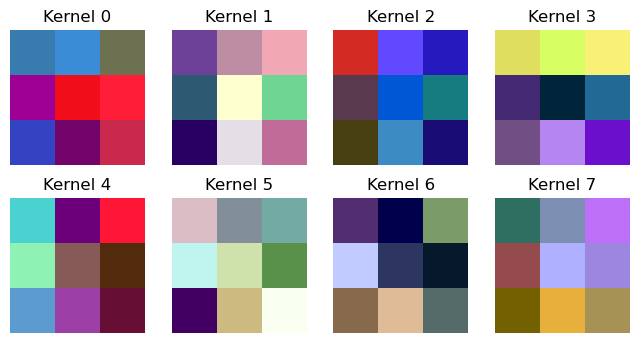

Epoch 5 Feature maps conv1:


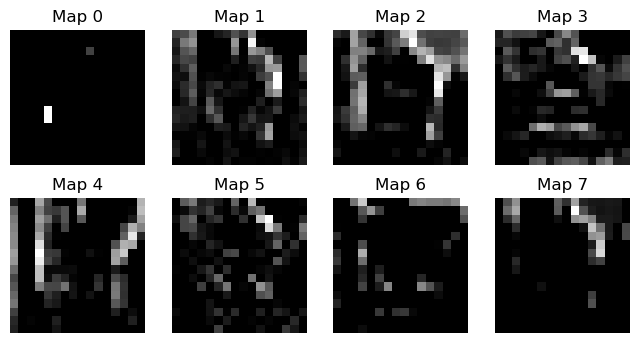

Epoch 5 Feature maps conv2:


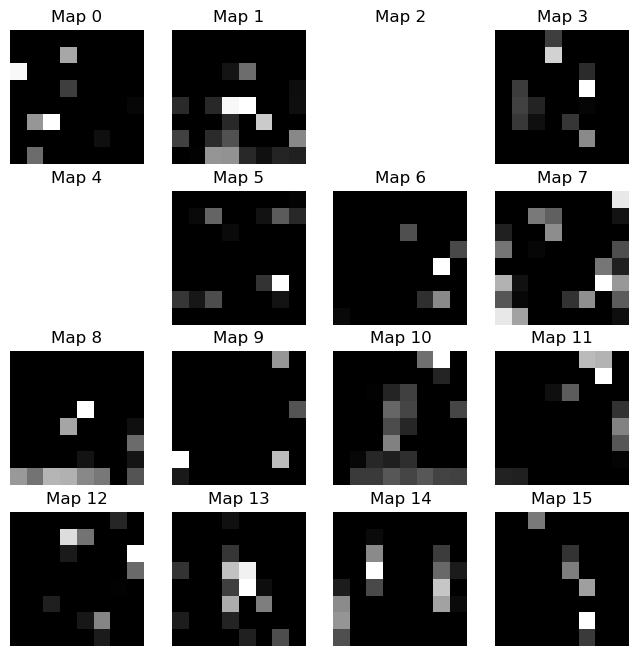

Epoch [5/10] Loss: 0.4803
Label: 8


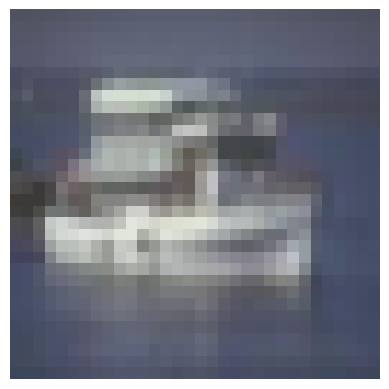

Epoch 6 Kernels conv1:


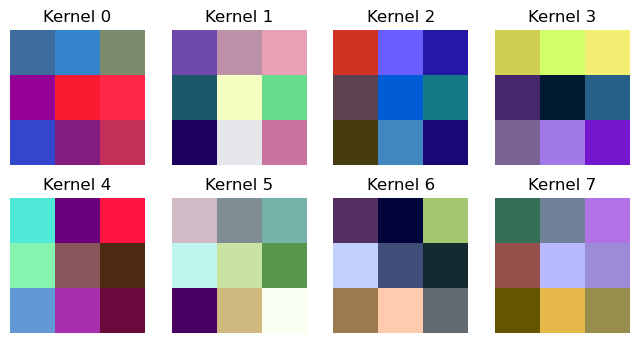

Epoch 6 Feature maps conv1:


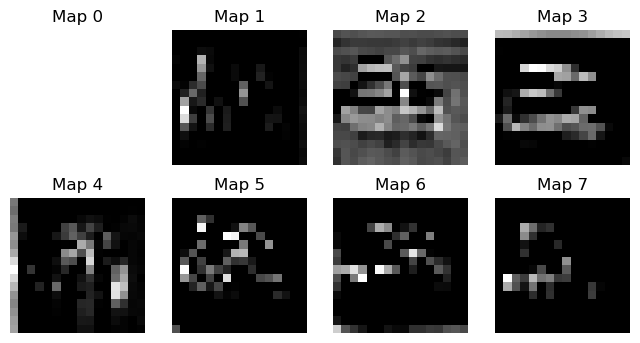

Epoch 6 Feature maps conv2:


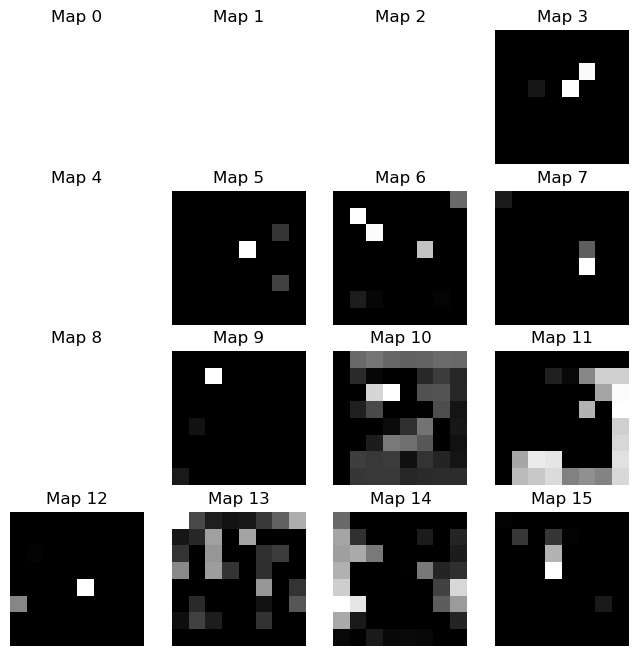

Epoch [6/10] Loss: 0.1496
Label: 6


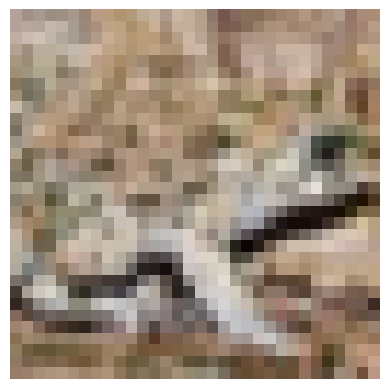

Epoch 7 Kernels conv1:


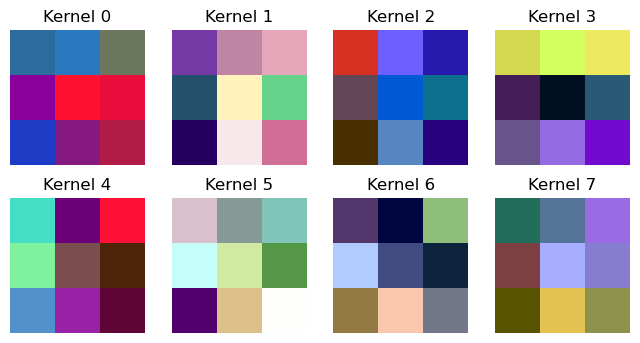

Epoch 7 Feature maps conv1:


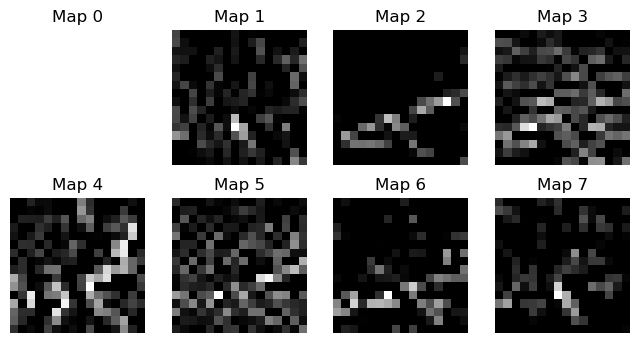

Epoch 7 Feature maps conv2:


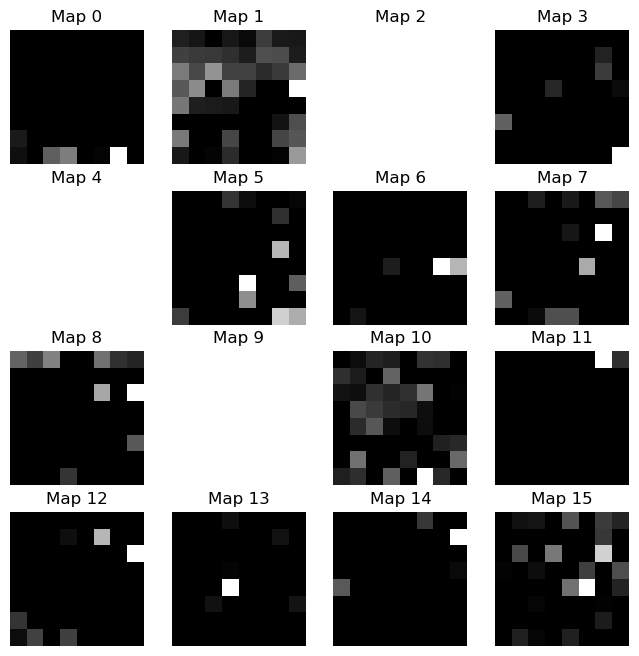

Epoch [7/10] Loss: 0.7212
Label: 5


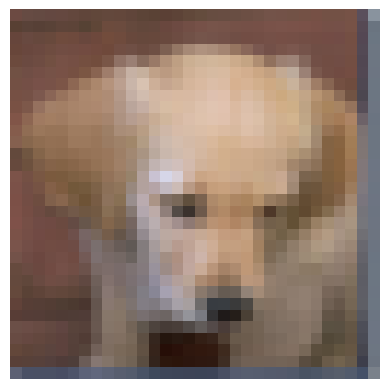

Epoch 8 Kernels conv1:


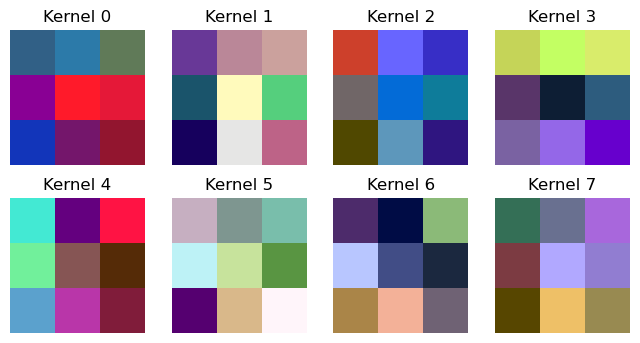

Epoch 8 Feature maps conv1:


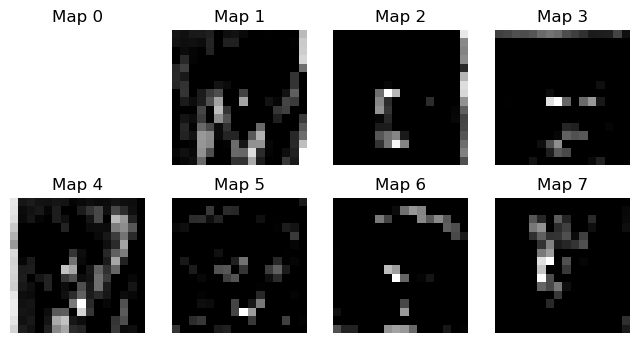

Epoch 8 Feature maps conv2:


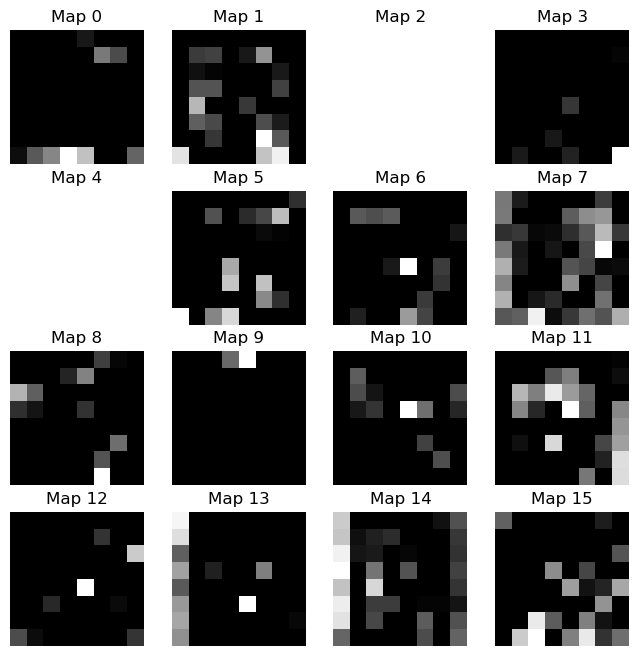

Epoch [8/10] Loss: 0.0455
Label: 1


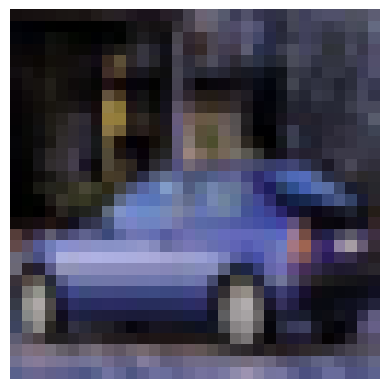

Epoch 9 Kernels conv1:


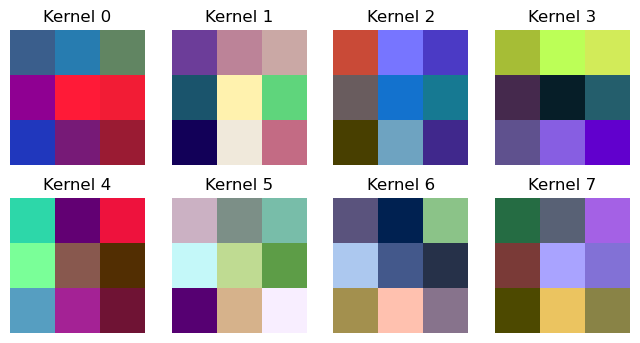

Epoch 9 Feature maps conv1:


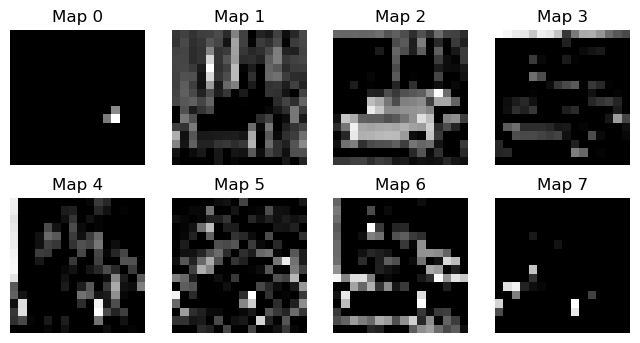

Epoch 9 Feature maps conv2:


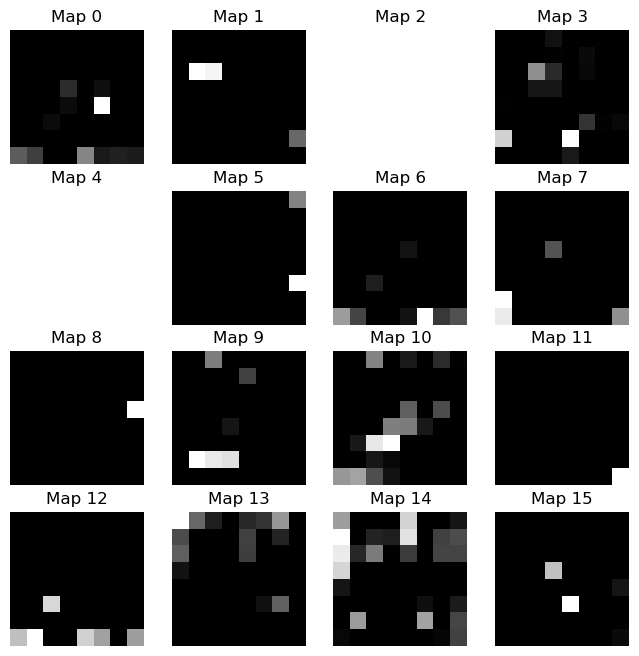

Epoch [9/10] Loss: 0.0113
Label: 7


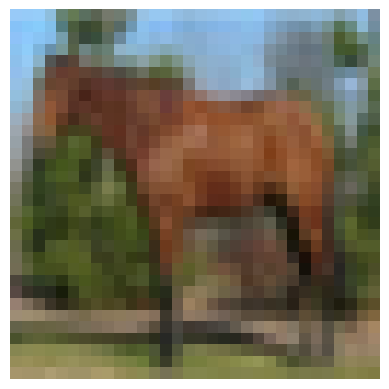

Epoch 10 Kernels conv1:


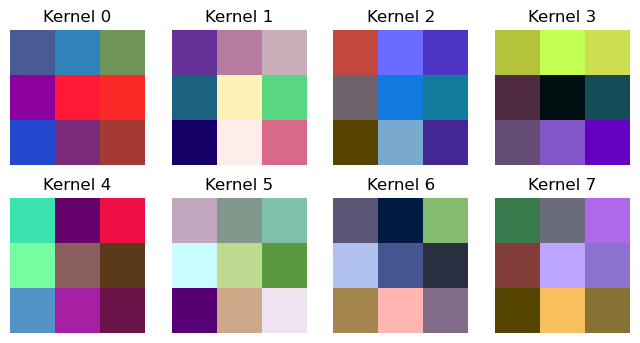

Epoch 10 Feature maps conv1:


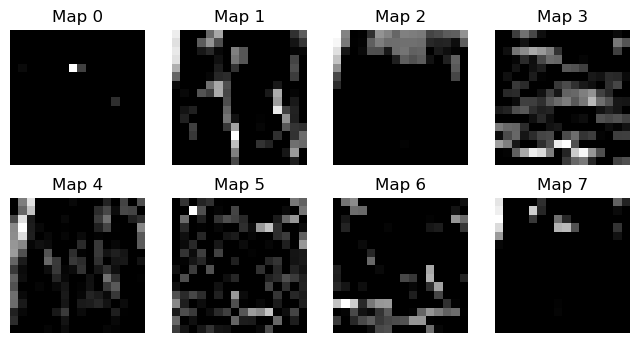

Epoch 10 Feature maps conv2:


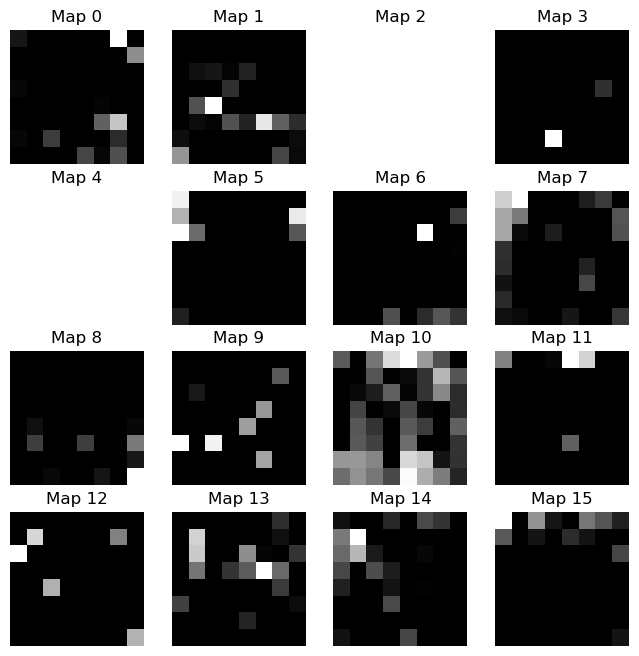

Epoch [10/10] Loss: 0.7378


In [65]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10  # Keep small for testing

for epoch in range(num_epochs):
    for batch_idx, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs, labels

        optimizer.zero_grad()
        outputs, fmap1, fmap2 = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Visualize kernels and feature maps after first batch of each epoch
        if batch_idx == 0:
            print("Label:", labels[0].item())
            plot_image(inputs[0])

            print(f"Epoch {epoch+1} Kernels conv1:")
            plot_kernels(model.conv1)

            print(f"Epoch {epoch+1} Feature maps conv1:")
            plot_feature_maps(fmap1)

            print(f"Epoch {epoch+1} Feature maps conv2:")
            plot_feature_maps(fmap2)

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item():.4f}")
